In [1]:
pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


# Class Exercise

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

In [3]:
#Cookies
class data_generator():

  def __init__(self):
    self.setup_cost = 3500 #q
    self.production_cost = 75 #p
    self.first_inventory = 100 #so
    self.inventory_cost = 5 #h

    self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    self.demands = [250, 250, 500, 500, 750, 750, 750, 750]

In [4]:
def opt_production_first(data):

    # Create the mip solver with the SCIP backend.
    m = pywraplp.Solver.CreateSolver('SCIP')

    # decision variables
    setup = [] #yt
    production = [] #xt
    inventory = [] #st
    for month in range(len(data.months)):
        suffix = '_{}'.format(month)
        setup.append(m.BoolVar('setup' + suffix))
        production.append(m.NumVar(0, sum(data.demands), 'production' + suffix))
        inventory.append(m.NumVar(0, sum(data.demands), 'inventory' + suffix))


    # constraints
    # Flow conservation constraint:
    c_0 = m.Add(data.first_inventory + production[0] == data.demands[0] + inventory[0])
    for month in range(1,len(data.months)):
        m.Add(inventory[month-1] + production[month] == data.demands[month] + inventory[month]) #flow conservation constraint


    for month in range(1,len(data.months)):
        m.Add(production[month] <= sum(data.demands[month:]) * setup[month]) #setup constraint



    # objective function

    m.Minimize(
    sum(setup * data.setup_cost) +
    sum(production * data.production_cost) +
    sum(inventory[:-1] * data.inventory_cost) +
    inventory[-1] * data.inventory_cost / 2
)

    # solving the model
    status = m.Solve()

    if status == pywraplp.Solver.OPTIMAL:

        PRODUCTION_PLAN = {}
        for m_idx, month in enumerate(data.months):
            PRODUCTION_PLAN[month] = {
                'production': production[m_idx].solution_value(), \
                'setup': setup[m_idx].solution_value(), \
                'inventory': inventory[m_idx].solution_value()
                }
        return PRODUCTION_PLAN

    else:
        print('The problem does not have an optimal solution.')


In [5]:
data = data_generator()
PRODUCTION_PLAN = opt_production_first(data)
df=(pd.DataFrame.from_dict(PRODUCTION_PLAN).round(0))
display(df)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
production,400.0,0.0,1000.0,0.0,750.0,750.0,750.0,750.0
setup,-0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
inventory,250.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(sum(df.loc["production"]))
print(sum(df.loc["setup"]))
print(sum(df.loc["inventory"]))

4400.0
5.0
750.0


Index(['production', 'setup', 'inventory'], dtype='object')


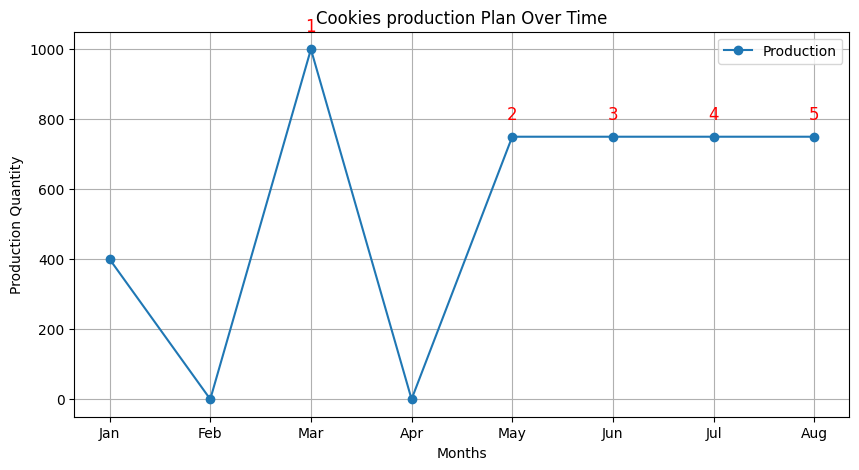

In [36]:
print(df.index)  # Check if "production" is actually in the index
df.index = df.index.str.strip().str.lower()  # Standardize index
months = df.columns
production_values = df.loc["production"].values
setup_values = df.loc["setup"].values  # Extract setup row

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(months, production_values, marker="o", linestyle="-", label="Production")

# Add annotations where setup = 1, numbering from 1 to 5
setup_indices = [i for i, val in enumerate(setup_values) if val == 1]  # Get indices where setup = 1
for i, idx in enumerate(setup_indices, start=1):
    plt.text(months[idx], production_values[idx] + 50, str(i), fontsize=12, color="red", ha="center")


plt.title("Cookies production Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Production Quantity")
plt.legend()
plt.grid(True)
plt.show()


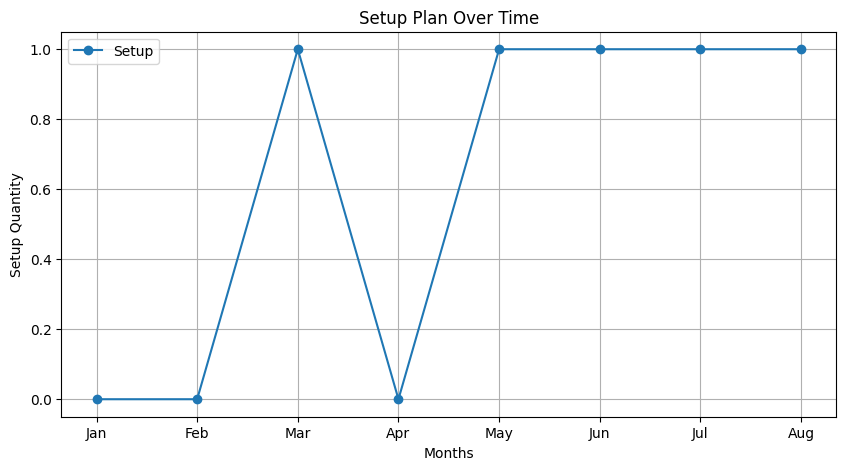

In [12]:
df.index = df.index.str.strip().str.lower()  # Standardize index
plt.figure(figsize=(10, 5))
plt.plot(df.columns, df.loc["setup"].values, marker="o", linestyle="-", label="Setup")
plt.title("Setup Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Setup Quantity")
plt.legend()
plt.grid(True)
plt.show()


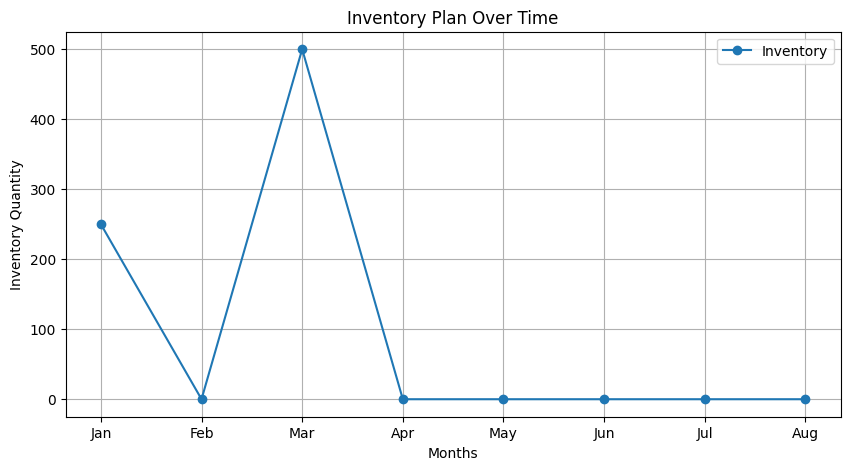

In [13]:
df.index = df.index.str.strip().str.lower()  # Standardize index
plt.figure(figsize=(10, 5))
plt.plot(df.columns, df.loc["inventory"].values, marker="o", linestyle="-", label="Inventory")
plt.title("Inventory Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Inventory Quantity")
plt.legend()
plt.grid(True)
plt.show()


## Question 1

In [14]:
#Brownies
class data_generator_second():

  def __init__(self):
    self.setup_cost = 2000
    self.production_cost = 45
    self.first_inventory = 0
    self.inventory_cost = 3

    self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    self.demands = [100, 150, 200, 250, 300, 350, 400, 450]

In [15]:
data = data_generator_second()
PRODUCTION_PLAN = opt_production_first(data)
df2 = (pd.DataFrame.from_dict(PRODUCTION_PLAN).round(0))
display(df2)
print(sum(df2.loc["production"]))
print(sum(df2.loc["setup"]))
print(sum(df2.loc["inventory"]))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
production,250.0,0.0,450.0,0.0,650.0,0.0,850.0,0.0
setup,-0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
inventory,150.0,0.0,250.0,0.0,350.0,0.0,450.0,0.0


2200.0
3.0
1200.0


In [17]:
Total_production = sum(df.loc["production"]) + sum(df2.loc["production"])
print('Total production: ', Total_production)

#calculate total production
Total_production_cost = sum(df.loc["production"])*75 + sum(df2.loc["production"])*45
print('Total production cost: ', Total_production_cost)
#calculate cost
Total_cost_setup = sum(df.loc["setup"]) * 3500 + sum(df2.loc["setup"]) * 2000
print('Total setup cost: ', Total_cost_setup)

Total_cost_inventory = sum(df.loc["inventory"]) * 5 + sum(df2.loc["inventory"]) * 3
print('Total inventory cost: ', Total_cost_inventory)

total_cost = Total_production_cost  + Total_cost_setup + Total_cost_inventory
print('Total cost: ', total_cost)


Total production:  6600.0
Total production cost:  429000.0
Total setup cost:  23500.0
Total inventory cost:  7350.0
Total cost:  459850.0


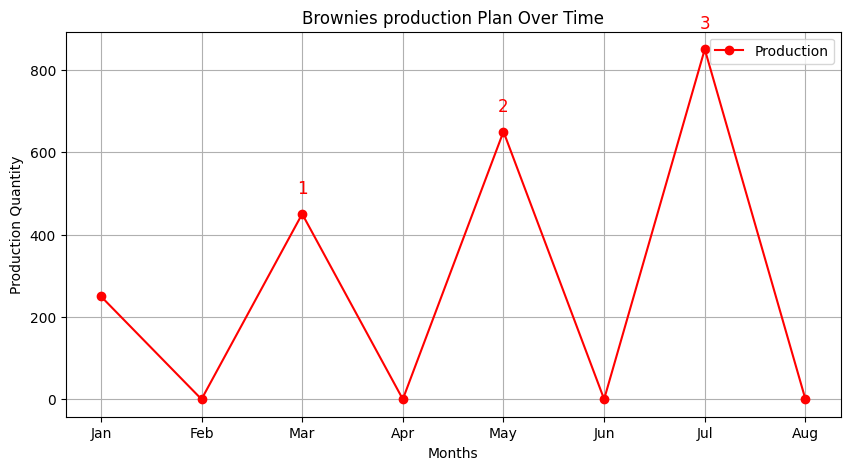

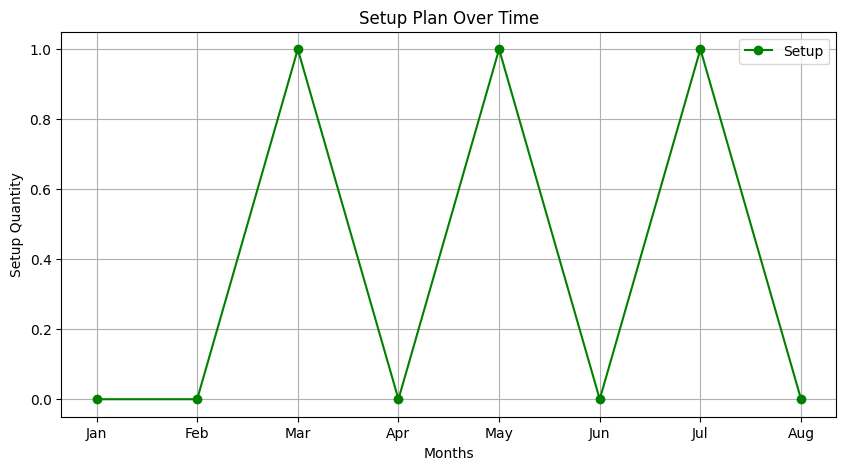

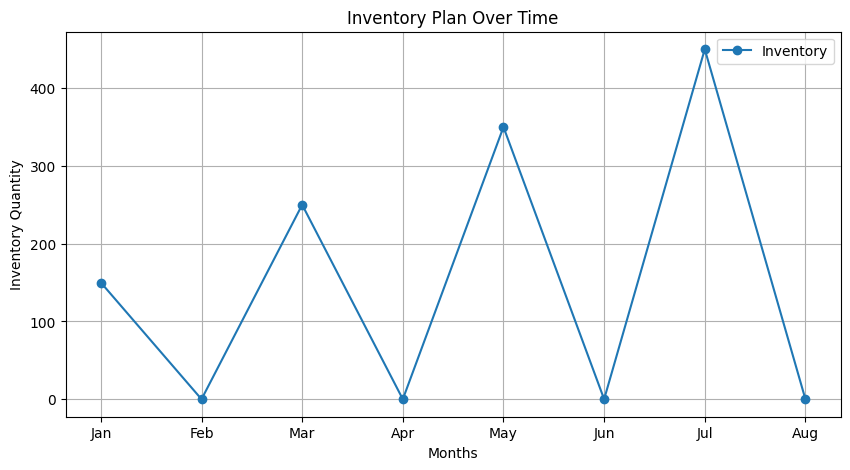

In [34]:
df2.index = df2.index.str.strip().str.lower()  # Standardize index

months = df2.columns
production_values = df2.loc["production"].values
setup_values = df2.loc["setup"].values  # Extract setup row

# Create the plot
plt.figure(figsize=(10, 5))

# Add annotations where setup = 1, numbering from 1 to 5
setup_indices_2 = [i for i, val in enumerate(setup_values) if val == 1]  # Get indices where setup = 1
for i, idx in enumerate(setup_indices_2, start=1):
    plt.text(months[idx], production_values[idx] + 50, str(i), fontsize=12, color="red", ha="center")

plt.plot(df2.columns, df2.loc["production"].values, marker="o", linestyle="-", color = "red", label="Production")
plt.title("Brownies production Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Production Quantity")
plt.legend()
plt.grid(True)
plt.show()

df2.index = df2.index.str.strip().str.lower()  # Standardize index
plt.figure(figsize=(10, 5))
plt.plot(df2.columns, df2.loc["setup"].values, marker="o", linestyle="-", color= "green", label="Setup")
plt.title("Setup Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Setup Quantity")
plt.legend()
plt.grid(True)
plt.show()

df.index = df2.index.str.strip().str.lower()  # Standardize index
plt.figure(figsize=(10, 5))
plt.plot(df2.columns, df2.loc["inventory"].values, marker="o", linestyle="-", label="Inventory")
plt.title("Inventory Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Inventory Quantity")
plt.legend()
plt.grid(True)
plt.show()

## Question 2

In [8]:
class data_generator_third():

  def __init__(self):
    self.setup_cost = [3500, 2000]
    self.production_cost = [75, 45]
    self.first_inventory = [100,0]
    self.inventory_cost = [5, 3]

    self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    self.demands = [[250, 250, 500, 500, 750, 750, 750, 750], \
                    [100, 150, 200, 250, 300, 350, 400, 450]]


In [41]:
print(len(data.demands))
print(1,len(data.months))

2
1 8


In [40]:
def opt_production_second(data):

    # Create the mip solver with the SCIP backend.
    m = pywraplp.Solver.CreateSolver('SCIP')

    # decision variables
    obj = m.NumVar(0, 1000000, 'obj')

    setup = []
    production = []
    inventory = []
    for bike in range(len(data.demands)):
      setup_temp = []
      production_temp = []
      inventory_temp = []
      for month in range(len(data.months)):
          suffix = '_{}_{}'.format(bike,month)
          setup_temp.append(m.BoolVar('setup' + suffix))
          production_temp.append(m.NumVar(0, sum(data.demands[bike]), 'production' + suffix))
          inventory_temp.append(m.NumVar(0, sum(data.demands[bike]), 'inventory' + suffix))

      setup.append(setup_temp)
      production.append(production_temp)
      inventory.append(inventory_temp)


    # constraints

    for bike in range(len(data.demands)):
      # **First-Month Inventory Balance Constraint**
      m.Add(data.first_inventory[bike] + production[bike][0] == data.demands[bike][0] + inventory[bike][0])

      for month in range(1,len(data.months)):
          m.Add(production[bike][month] <= sum(data.demands[bike][month:]) * setup[bike][month]) #setup constraint
          m.Add(inventory[bike][month-1] + production[bike][month] == data.demands[bike][month] + inventory[bike][month]) #flow conservation constraint



    m.Add(obj >= sum(
        sum(setup[bike]) * data.setup_cost[bike] + \
        sum(production[bike]) * data.production_cost[bike] +\
        sum(inventory[bike][:-1]) * data.inventory_cost[bike] +\
        inventory[bike][-1] * data.inventory_cost[bike] / 2
        for bike in range(len(data.demands))))

    # objective function
    m.Minimize(obj)

    # solving the model
    status = m.Solve()

    if status == pywraplp.Solver.OPTIMAL:

        PRODUCTION_PLAN = {}
        for bike in range(len(data.demands)):
          PRODUCTION_PLAN_temp = {}
          for m_idx, month in enumerate(data.months):
              PRODUCTION_PLAN_temp[month] = {
                  'production': production[bike][m_idx].solution_value(), \
                  'setup': setup[bike][m_idx].solution_value(), \
                  'inventory': inventory[bike][m_idx].solution_value()
                  }
          PRODUCTION_PLAN[bike] = PRODUCTION_PLAN_temp
        return PRODUCTION_PLAN, obj.solution_value()

    else:
        print('The problem does not have an optimal solution.')


data = data_generator_third()
PRODUCTION_PLAN, obj = opt_production_second(data)
display(pd.DataFrame.from_dict(PRODUCTION_PLAN[0]).round(0))
display(pd.DataFrame.from_dict(PRODUCTION_PLAN[1]).round(0))
print('objective is : ', round(obj))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
production,400.0,0.0,1000.0,0.0,750.0,750.0,750.0,750.0
setup,-0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
inventory,250.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
production,250.0,0.0,450.0,0.0,650.0,0.0,850.0,0.0
setup,-0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
inventory,150.0,0.0,250.0,0.0,350.0,0.0,450.0,0.0


objective is :  459850


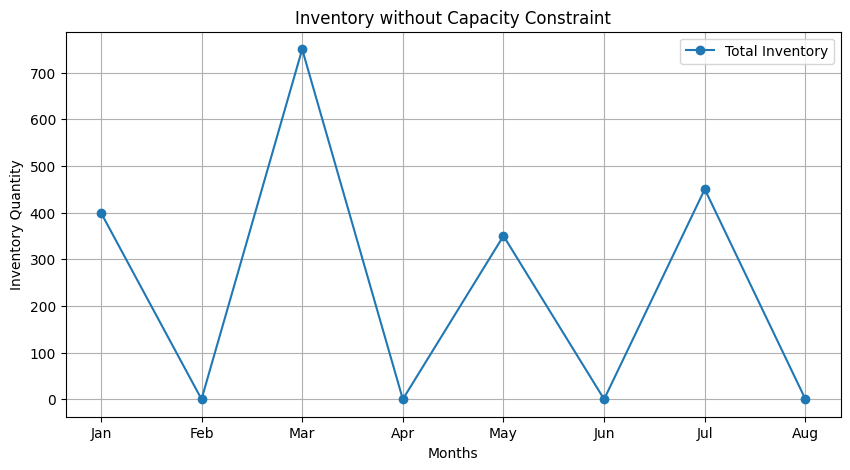

In [49]:
df5 = pd.DataFrame.from_dict(PRODUCTION_PLAN[0]).round(0)  # First product inventory
df6 = pd.DataFrame.from_dict(PRODUCTION_PLAN[1]).round(0)  # Second product inventory

# Extract inventory levels from both products
inventory_product_1 = df5.loc["inventory"]
inventory_product_2 = df6.loc["inventory"]

# Sum inventory levels from both products
total_inventory = inventory_product_1 + inventory_product_2

plt.figure(figsize=(10, 5))
unrestraint_inventory = plt.plot(total_inventory.index, total_inventory.values, marker="o", linestyle="-", label="Total Inventory")

plt.title("Inventory without Capacity Constraint")
plt.xlabel("Months")
plt.ylabel("Inventory Quantity")
plt.legend()
plt.grid(True)

plt.show()


## Question 3

In [55]:
def opt_production_third(data):

    # Create the mip solver with the SCIP backend.
    m = pywraplp.Solver.CreateSolver('SCIP')

    # decision variables
    obj = m.NumVar(0, 1000000, 'obj')

    setup = []
    production = []
    inventory = []
    for bike in range(len(data.demands)):
      setup_temp = []
      production_temp = []
      inventory_temp = []
      for month in range(len(data.months)):
          suffix = '_{}_{}'.format(bike,month)
          setup_temp.append(m.BoolVar('setup' + suffix))
          production_temp.append(m.NumVar(0, sum(data.demands[bike]), 'production' + suffix))
          inventory_temp.append(m.NumVar(0, sum(data.demands[bike]), 'inventory' + suffix))

      setup.append(setup_temp)
      production.append(production_temp)
      inventory.append(inventory_temp)


    # constraints
    m.Add(obj >= sum(
        sum(setup[bike]) * data.setup_cost[bike] + \
        sum(production[bike]) * data.production_cost[bike] +\
        sum(inventory[bike][:-1]) * data.inventory_cost[bike] +\
        inventory[bike][-1] * data.inventory_cost[bike] / 2
        for bike in range(len(data.demands))))

    # constraints

    for bike in range(len(data.demands)):
      # **First-Month Inventory Balance Constraint**
      m.Add(data.first_inventory[bike] + production[bike][0] == data.demands[bike][0] + inventory[bike][0])

      for month in range(1,len(data.months)):
          m.Add(production[bike][month] <= sum(data.demands[bike][month:]) * setup[bike][month]) #setup constraint
          m.Add(inventory[bike][month-1] + production[bike][month] == data.demands[bike][month] + inventory[bike][month]) #flow conservation constraint

#capacity constraint:
    for month in range(1,len(data.months)):
        m.Add(sum(production[bike][month] for bike in range(len(data.demands))) <= 1000)




    # objective function
    m.Minimize(obj)

    # solving the model
    status = m.Solve()

    if status == pywraplp.Solver.OPTIMAL:

        PRODUCTION_PLAN = {}
        for bike in range(len(data.demands)):
          PRODUCTION_PLAN_temp = {}
          for m_idx, month in enumerate(data.months):
              PRODUCTION_PLAN_temp[month] = {
                  'production': production[bike][m_idx].solution_value(), \
                  'setup': setup[bike][m_idx].solution_value(), \
                  'inventory': inventory[bike][m_idx].solution_value()
                  }
          PRODUCTION_PLAN[bike] = PRODUCTION_PLAN_temp
        return PRODUCTION_PLAN, obj.solution_value()

    else:
        print('The problem does not have an optimal solution.')


data = data_generator_third()
PRODUCTION_PLAN, obj = opt_production_third(data)
df3 = (pd.DataFrame.from_dict(PRODUCTION_PLAN[0]).round(0))
df4 = (pd.DataFrame.from_dict(PRODUCTION_PLAN[1]).round(0))

display(df3)
display(df4)
print('objective is : ', round(obj))

NameError: name 'PRODUCTION_PLAN_2' is not defined

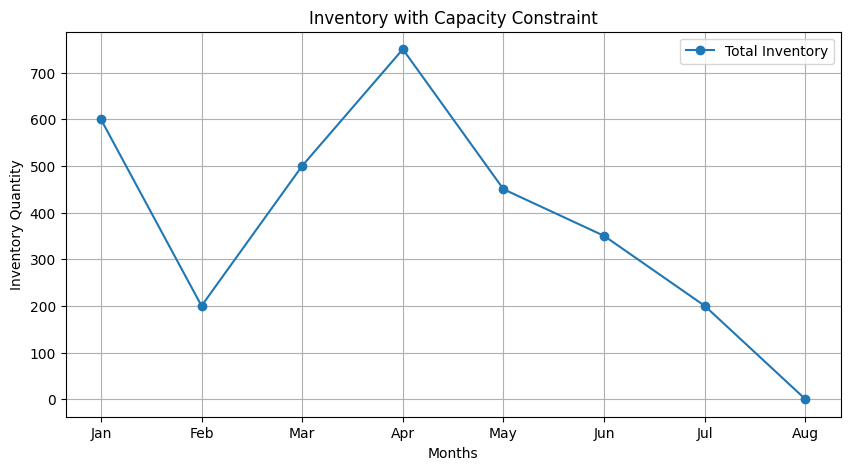

In [54]:
df7 = pd.DataFrame.from_dict(PRODUCTION_PLAN[0]).round(0)  # First product inventory
df8 = pd.DataFrame.from_dict(PRODUCTION_PLAN[1]).round(0)  # Second product inventory

# Extract inventory levels from both products
inventory_product_1_2 = df7.loc["inventory"]
inventory_product_2_2 = df8.loc["inventory"]

# Sum inventory levels from both products
total_inventory_2 = inventory_product_1_2 + inventory_product_2_2

plt.figure(figsize=(10, 5))
restraint_inventory = plt.plot(total_inventory_2.index, total_inventory_2.values, marker="o", linestyle="-", label="Total Inventory")

plt.title("Inventory with Capacity Constraint")
plt.xlabel("Months")
plt.ylabel("Inventory Quantity")
plt.legend()
plt.grid(True)

plt.show()

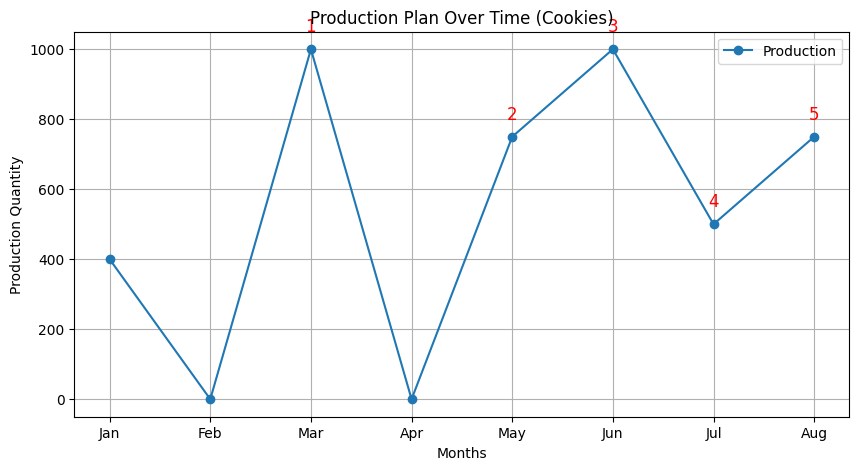

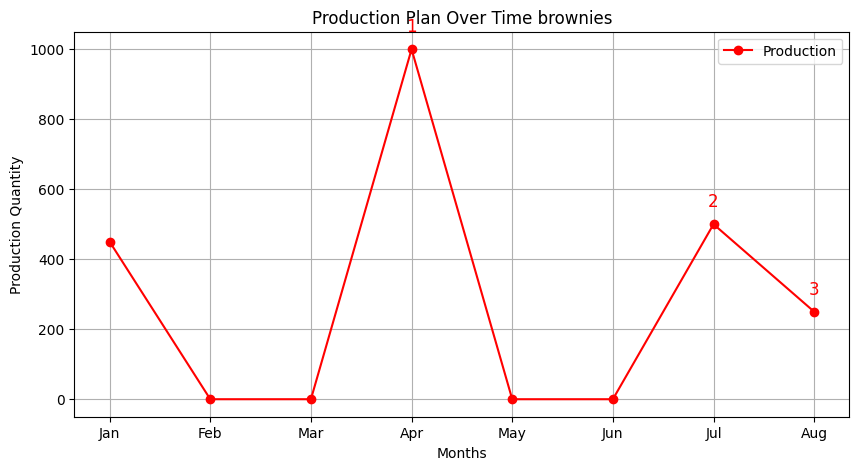

In [33]:
# Standardize index for consistency
df3.index = df3.index.str.strip().str.lower()

# Extract production and setup data
months = df3.columns
production_values = df3.loc["production"].values
setup_values = df3.loc["setup"].values  # Extract setup row

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(months, production_values, marker="o", linestyle="-", label="Production")

# Add annotations where setup = 1, numbering from 1 to 5
setup_indices_3 = [i for i, val in enumerate(setup_values) if val == 1]  # Get indices where setup = 1
for i, idx in enumerate(setup_indices_3, start=1):
    plt.text(months[idx], production_values[idx] + 50, str(i), fontsize=12, color="red", ha="center")

# Add titles and labels
plt.title("Production Plan Over Time (Cookies)")
plt.xlabel("Months")
plt.ylabel("Production Quantity")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

df.index = df4.index.str.strip().str.lower()  # Standardize index
# Extract production and setup data
months = df4.columns
production_values = df4.loc["production"].values
setup_values = df4.loc["setup"].values  # Extract setup row

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(months, production_values, marker="o", linestyle="-",color = "red", label="Production")

# Add annotations where setup = 1, numbering from 1 to 5
setup_indices_4 = [i for i, val in enumerate(setup_values) if val == 1]  # Get indices where setup = 1
for i, idx in enumerate(setup_indices_4, start=1):
    plt.text(months[idx], production_values[idx] + 50, str(i), fontsize=12, color="red", ha="center")


plt.title("Production Plan Over Time brownies")
plt.xlabel("Months")
plt.ylabel("Production Quantity")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#calculate total production
Total_production = sum(df3.loc["production"]) + sum(df4.loc["production"])
print('Total production: ', Total_production)

Total_production_cost = sum(df3.loc["production"])*75 + sum(df4.loc["production"])*45
print('Total production cost: ', Total_production_cost)
#calculate cost
Total_cost_setup = sum(df3.loc["setup"]) * 3500 + sum(df4.loc["setup"]) * 2000
print('Total setup cost: ', Total_cost_setup)

Total_cost_inventory = sum(df3.loc["inventory"]) * 5 + sum(df4.loc["inventory"]) * 3
print('Total inventory cost: ', Total_cost_inventory)

total_cost = Total_production_cost  + Total_cost_setup + Total_cost_inventory
print('Total cost: ', total_cost)

Total production:  6600.0
Total production cost:  429000.0
Total setup cost:  23500.0
Total inventory cost:  11150.0
Total cost:  463650.0


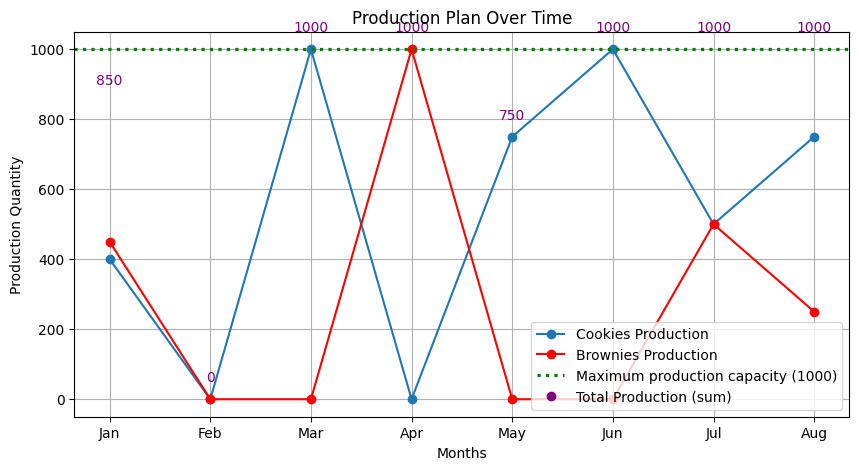

In [59]:
import matplotlib.pyplot as plt

# Standardize index for both DataFrames
df3.index = df3.index.str.strip().str.lower()
df4.index = df4.index.str.strip().str.lower()

# Extract production values
months = df3.columns
production_cookies = df3.loc["production"].values
production_brownies = df4.loc["production"].values

# Compute total production per month
total_production = production_cookies + production_brownies

# Create the plot
plt.figure(figsize=(10, 5))

# Plot df3 (cookies) production
plt.plot(months, production_cookies, marker="o", linestyle="-", label="Cookies Production")

# Plot df4 (brownies) production
plt.plot(months, production_brownies, marker="o", linestyle="-", color="red", label="Brownies Production")

# Add a horizontal dotted line at 1000
plt.axhline(y=1000, linestyle="dotted", color="green", linewidth=2.3, label="Maximum production capacity (1000)")

# Annotate each month with total production
for i, month in enumerate(months):
    plt.text(month, total_production[i] + 50, str(int(total_production[i])),
             fontsize=10, color="purple", ha="center")

# **Add a dummy plot for the legend to represent the total production annotations**
plt.plot([], [], color="purple", marker="o", linestyle="None", label="Total Production (sum)")

# Add titles and labels
plt.title("Production Plan Over Time")
plt.xlabel("Months")
plt.ylabel("Production Quantity")
plt.legend()  # Show legend to differentiate lines
plt.grid(True)

# Show the combined plot
plt.show()


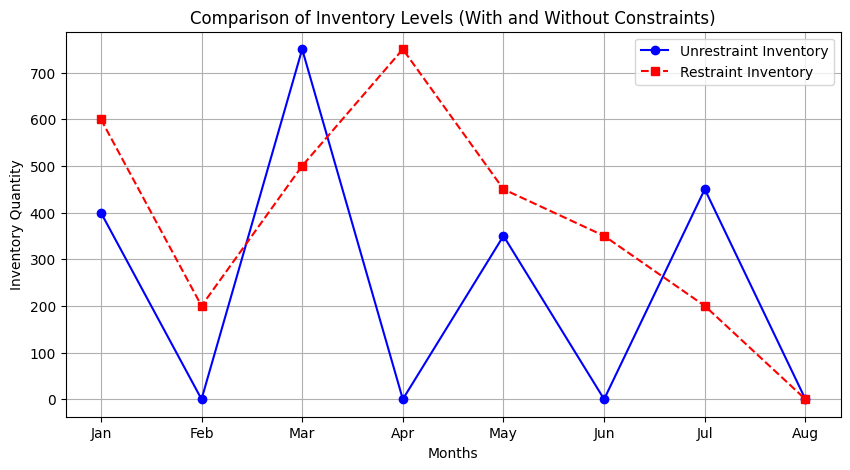

In [56]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 5))

# Re-plot Unrestraint Inventory (without capacity constraint)
plt.plot(total_inventory.index, total_inventory.values, marker="o", linestyle="-", color="blue", label="Unrestraint Inventory")

# Re-plot Restraint Inventory (with capacity constraint)
plt.plot(total_inventory_2.index, total_inventory_2.values, marker="s", linestyle="--", color="red", label="Restraint Inventory")

# Add title, labels, and legend
plt.title("Comparison of Inventory Levels (With and Without Constraints)")
plt.xlabel("Months")
plt.ylabel("Inventory Quantity")
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()
